## 2. pandas란
- panel datas의 약자, 파이썬을 활용한 데이터 분석에서 가장 많이 활용됨
- Series, 1차원 형태의 데이터 구조 ==> vector
- DataFrame, 2차원 배열 형태의 데이터 구조 ==> metrics

## 3. 데이터 프레임 기초


### 인덱스 만들기(날짜 형태로 된 8개의 인덱스)

In [1]:
import pandas as pd

#날짜 형태로 된 8개의 인덱스를 생성
index = pd.date_range('1/1/2000', periods=8)
print(index)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08'],
              dtype='datetime64[ns]', freq='D')


### 8행 3열의 랜덤 데이터(numpy 활용)에 인덱스, 컬럼 이름 설정된 데이터 프레임 생성

In [2]:
import numpy as np

#numpy 라이브러리를 활용하여 8행 3열로 구성된 랜덤 데이터를 생성한 후, 인덱스와 컬럼 이름을 정하여 데이터 프레임으로 만듦
df = pd.DataFrame(np.random.rand(8,3), index=index, columns=list('ABC'))
df

,A,B,C
2000-01-01,0.990080,0.502037,0.571838
2000-01-02,0.055041,0.723082,0.942187
2000-01-03,0.105817,0.208732,0.004543
2000-01-04,0.603882,0.396967,0.887271
2000-01-05,0.743122,0.335370,0.491033
2000-01-06,0.701735,0.441902,0.931952
2000-01-07,0.329996,0.432489,0.528817
2000-01-08,0.081097,0.493329,0.115479


### 특정 열('B')에 접근하기

In [3]:
import pandas as pd
import numpy as np

index = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.rand(8,3), index=index, columns=list('ABC'))
print(df['B'])

2000-01-01    0.193650
2000-01-02    0.029045
2000-01-03    0.844162
2000-01-04    0.616301
2000-01-05    0.430578
2000-01-06    0.188175
2000-01-07    0.274811
2000-01-08    0.345940
Freq: D, Name: B, dtype: float64


🔼인덱스는 자동으로 붙어나옴

### 특정 열('B')에 마스크 생성하기

In [4]:
import pandas as pd
import numpy as np

index = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.rand(8,3), index=index, columns=list('ABC'))
print(df['B']>0.4)

2000-01-01     True
2000-01-02     True
2000-01-03    False
2000-01-04    False
2000-01-05     True
2000-01-06     True
2000-01-07     True
2000-01-08    False
Freq: D, Name: B, dtype: bool


### 마스크 적용된 결과를 데이터 프레임으로 저장하기

In [5]:
df2 = df[df['B']>0.4]
df2

,A,B,C
2000-01-01,0.760969,0.728853,0.398477
2000-01-02,0.818707,0.904611,0.817215
2000-01-05,0.041450,0.570331,0.466706
2000-01-06,0.378233,0.871381,0.273622
2000-01-07,0.387266,0.865537,0.642623


### 행과 열 바꿔주기

In [6]:
df2.T

,2000-01-01,2000-01-02,2000-01-05,2000-01-06,2000-01-07
A,0.760969,0.818707,0.041450,0.378233,0.387266
B,0.728853,0.904611,0.570331,0.871381,0.865537
C,0.398477,0.817215,0.466706,0.273622,0.642623


### A열의 값을 B열의 값으로 나눈 결과로 D열 만들기(행 우선 계산)

In [7]:
import pandas as pd
import numpy as np

index = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.rand(8,3), index=index, columns=list('ABC'))
df['D'] = df['A']/df['B']    #A열의 값을 B열의 값으로 나눈 값을 D열에 저장
df

,A,B,C,D
2000-01-01,0.403389,0.603496,0.742033,0.668420
2000-01-02,0.419854,0.877746,0.087685,0.478333
2000-01-03,0.461739,0.793009,0.760113,0.582262
2000-01-04,0.746026,0.928434,0.104983,0.803531
2000-01-05,0.080613,0.042582,0.323942,1.893132
2000-01-06,0.018103,0.728354,0.914046,0.024855
2000-01-07,0.358416,0.803874,0.453063,0.445861
2000-01-08,0.928063,0.418773,0.633795,2.216147


### A열의 값을 B열의 값으로 나눈 결과로 D열 만들기(열 우선 계산)

In [8]:
import pandas as pd
import numpy as np

index = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.rand(8,3), index=index, columns=list('ABC'))
df['D'] = df['A']/df['B']
df['E'] = np.sum(df, axis=1)    # 행 우선 계산 값을 E열에 저장     /'axis=1': 열 축(가로방향)으로!
df.head()

,A,B,C,D,E
2000-01-01,0.219183,0.182384,0.825665,1.201772,2.429004
2000-01-02,0.732829,0.512133,0.145706,1.430935,2.821603
2000-01-03,0.078849,0.408647,0.703281,0.192952,1.383730
2000-01-04,0.144915,0.102249,0.999097,1.417272,2.663534
2000-01-05,0.423651,0.550992,0.863607,0.768888,2.607137


In [9]:
import pandas as pd
import numpy as np

index = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.rand(8,3), index=index, columns=list('ABC'))
df['D'] = df['A']/df['B']
df['E'] = np.sum(df, axis=1)    # 행 우선 계산 값을 E열에 저장
df = df.sub(df['A'], axis=0)    # A열의 데이터를 기준으로 열 우선 계산(빼기)   'axis=0':행 축(세로방향)으로
df.head()

,A,B,C,D,E
2000-01-01,0.0,-0.483431,-0.037443,1.410690,3.478776
2000-01-02,0.0,0.440688,0.005389,0.008221,2.087607
2000-01-03,0.0,0.225974,0.184355,0.156457,2.227940
2000-01-04,0.0,0.004880,-0.146088,0.668276,1.476694
2000-01-05,0.0,-0.493899,-0.411477,1.508062,3.170635


### 모든 값을 C열의 값으로 나눈 후 csv파일로 저장하기

In [10]:
import pandas as pd
import numpy as np

index = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.rand(8,3), index=index, columns=list('ABC'))
df['D'] = df['A']/df['B']
df['E'] = np.sum(df, axis=1)    # 행 우선 계산 값을 E열에 저장     /'axis=1': 열 축(가로방향)으로!
df = df.sub(df['A'], axis=0)    # A열의 데이터를 기준으로 열 우선 계산(빼기)   /'axis=0':행 축(세로방향)으로
df = df.div(df['C'], axis=0)    # C열 데이터를 기준으로 열 우선 계산(나누기)
df.to_csv('test.csv')           # 데이터 프레임을 test.csv 파일로 저장
df.head()

,A,B,C,D,E
2000-01-01,-0.0,34.320484,1.0,-524.284305,-600.064627
2000-01-02,0.0,0.015714,1.0,0.948391,2.755376
2000-01-03,-0.0,1.380907,1.0,-3.759915,-11.873198
2000-01-04,0.0,-4.997394,1.0,10.102735,78.933885
2000-01-05,0.0,0.047007,1.0,1.777002,3.710955


## 1. 위키피디아 데이터 엑셀로 저장하기

In [12]:
import pandas as pd
df = pd.read_html('https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table')

In [13]:
df

[                                       Olympic Games
 0                                        Main topics
 1  Bids Boycotts Ceremonies Charter Host cities I...
 2                                              Games
 3  Summer Winter Youth African Asian European Pac...
 4  .mw-parser-output .navbar{display:inline;font-...,
                                              Team Summer Games  \
                                   Team (IOC code)            №   
 0                               Afghanistan (AFG)           14   
 1                                   Algeria (ALG)           13   
 2                                 Argentina (ARG)           24   
 3                                   Armenia (ARM)            6   
 4                         Australasia (ANZ) [ANZ]            2   
 ..                                            ...          ...   
 148                          Zimbabwe (ZIM) [ZIM]           13   
 149      Independent Olympic Athletes (IOA) [IOA]            3   
 150 

In [14]:
print(df)

[                                       Olympic Games
0                                        Main topics
1  Bids Boycotts Ceremonies Charter Host cities I...
2                                              Games
3  Summer Winter Youth African Asian European Pac...
4  .mw-parser-output .navbar{display:inline;font-...,                                              Team Summer Games  \
                                  Team (IOC code)            №   
0                               Afghanistan (AFG)           14   
1                                   Algeria (ALG)           13   
2                                 Argentina (ARG)           24   
3                                   Armenia (ARM)            6   
4                         Australasia (ANZ) [ANZ]            2   
..                                            ...          ...   
148                          Zimbabwe (ZIM) [ZIM]           13   
149      Independent Olympic Athletes (IOA) [IOA]            3   
150  Independent Oly

### 불러온 데이터의 1번 인덱스에 저장된 내용 출력하기

In [15]:
df[1]

Team Summer Games  \
                                  Team (IOC code)            №   
0                               Afghanistan (AFG)           14   
1                                   Algeria (ALG)           13   
2                                 Argentina (ARG)           24   
3                                   Armenia (ARM)            6   
4                         Australasia (ANZ) [ANZ]            2   
..                                            ...          ...   
148                          Zimbabwe (ZIM) [ZIM]           13   
149      Independent Olympic Athletes (IOA) [IOA]            3   
150  Independent Olympic Participants (IOP) [IOP]            1   
151                        Mixed team (ZZX) [ZZX]            3   
152                                        Totals           28   

                                                                     \
    Unnamed: 2_level_1 Unnamed: 3_level_1 Unnamed: 4_level_1  Total   
0                    0                  0                  2      2   
1                    5                  4                  8     17   
2                   21                 25                 28     74   
3                    2                  6                  6     14   
4                    3                  4                  5     12   
..                 ...                ...                ...    ...   
148                  3                  4                  1      8   
149                  1                  0                  1      2   
150                  0                  1                  2      3   
151                  8                  5                  4     17   
152               5116               5080               5487  15683   

    Winter Games                                                           \
               № Unnamed: 7_level_1 Unnamed: 8_level_1 Unnamed: 9_level_1   
0              0                  0                  0                  0   
1              3                  0                  0                  0   
2             19                  0                  0                  0   
3              7                  0                  0                  0   
4              0                  0                  0                  0   
..           ...                ...                ...                ...   
148            1                  0                  0                  0   
149            0                  0                  0                  0   
150            0                  0                  0                  0   
151            0                  0                  0                  0   
152           23               1062               1059               1050   

          Combined Total                                          \
    Total              № Unnamed: 12_level_1 Unnamed: 13_level_1   
0       0             14                   0                   0   
1       0             16                   5                   4   
2       0             43                  21                  25   
3       0             13                   2                   6   
4       0              2                   3                   4   
..    ...            ...                 ...                 ...   
148     0             14                   3                   4   
149     0              3                   1                   0   
150     0              1                   0                   1   
151     0              3                   8                   5   
152  3171             51                6178                6139   

                                
    Unnamed: 14_level_1  Total  
0                     2      2  
1                     8     17  
2                    28     74  
3                     6     14  
4                     5     12  
..                  ...    ...  
148                   1      8  
149                   1      2  
150                   2      3  
151         

### 헤더를 열 이름으로 저장하고, 나라 이름을 인덱스 이름으로 지정하는 속성 추가

In [16]:
df = pd.read_html('https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table', header=0, index_col=0)
df[1]

,Summer Games,Summer Games.1,Summer Games.2,Summer Games.3,Summer Games.4,Winter Games,Winter Games.1,Winter Games.2,Winter Games.3,Winter Games.4,Combined Total,Combined Total.1,Combined Total.2,Combined Total.3,Combined Total.4
Team,,,,,,,,,,,,,,,
Team (IOC code),№,NaN,NaN,NaN,Total,№,NaN,NaN,NaN,Total,№,NaN,NaN,NaN,Total
Afghanistan (AFG),14,0.0,0.0,2.0,2,0,0.0,0.0,0.0,0,14,0.0,0.0,2.0,2
Algeria (ALG),13,5.0,4.0,8.0,17,3,0.0,0.0,0.0,0,16,5.0,4.0,8.0,17
Argentina (ARG),24,21.0,25.0,28.0,74,19,0.0,0.0,0.0,0,43,21.0,25.0,28.0,74
Armenia (ARM),6,2.0,6.0,6.0,14,7,0.0,0.0,0.0,0,13,2.0,6.0,6.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe (ZIM) [ZIM],13,3.0,4.0,1.0,8,1,0.0,0.0,0.0,0,14,3.0,4.0,1.0,8
Independent Olympic Athletes (IOA) [IOA],3,1.0,0.0,1.0,2,0,0.0,0.0,0.0,0,3,1.0,0.0,1.0,2
Independent Olympic Participants (IOP) [IOP],1,0.0,1.0,2.0,3,0,0.0,0.0,0.0,0,1,0.0,1.0,2.0,3


### 하계올림픽에 대한 데이터만 추출하기(앞의 5개 데이터 슬라이싱)

In [17]:
# iloc: 데이터의 순서에 따라 접근. 앞은 행, 뒤는 열에 접근
# iloc[:,:5] : 모든 행에 대해, 앞에서 5개의 열을 슬라이싱
summer = df[1].iloc[:,:5]
summer

,Summer Games,Summer Games.1,Summer Games.2,Summer Games.3,Summer Games.4
Team,,,,,
Team (IOC code),№,NaN,NaN,NaN,Total
Afghanistan (AFG),14,0.0,0.0,2.0,2
Algeria (ALG),13,5.0,4.0,8.0,17
Argentina (ARG),24,21.0,25.0,28.0,74
Armenia (ARM),6,2.0,6.0,6.0,14
...,...,...,...,...,...
Zimbabwe (ZIM) [ZIM],13,3.0,4.0,1.0,8
Independent Olympic Athletes (IOA) [IOA],3,1.0,0.0,1.0,2
Independent Olympic Participants (IOP) [IOP],1,0.0,1.0,2.0,3


### 컬럼 이름 설정하기

In [24]:
summer = df[1].iloc[1:, :5]     #NaN이 있는 첫 줄은 제외
summer.columns = ['경기수', '금', '은', '동', '계']
#print(summer)
summer

,경기수,금,은,동,계
Team,,,,,
Afghanistan (AFG),14,0.0,0.0,2.0,2
Algeria (ALG),13,5.0,4.0,8.0,17
Argentina (ARG),24,21.0,25.0,28.0,74
Armenia (ARM),6,2.0,6.0,6.0,14
Australasia (ANZ) [ANZ],2,3.0,4.0,5.0,12
...,...,...,...,...,...
Zimbabwe (ZIM) [ZIM],13,3.0,4.0,1.0,8
Independent Olympic Athletes (IOA) [IOA],3,1.0,0.0,1.0,2
Independent Olympic Participants (IOP) [IOP],1,0.0,1.0,2.0,3


### 금메달 기준으로 데이터 정렬하기(내림차순)

In [26]:
import pandas as pd
df = pd.read_html('https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table', header=0, index_col=0)
summer = df[1].iloc[1:, :5]     #NaN이 있는 첫 줄은 제외
summer.columns = ['경기수', '금', '은', '동', '계']
#print(summer.sort_values('금', ascending=False))
summer.sort_values('금', ascending=False)

,경기수,금,은,동,계
Team,,,,,
Totals,28,5116.0,5080.0,5487.0,15683
United States (USA) [P] [Q] [R] [Z] [F],27,1022.0,795.0,706.0,2523
Soviet Union (URS) [URS],9,395.0,319.0,296.0,1010
Great Britain (GBR) [GBR] [Z],28,263.0,295.0,293.0,851
China (CHN) [CHN],10,224.0,167.0,155.0,546
...,...,...,...,...,...
Lebanon (LIB),17,0.0,2.0,2.0,4
Eritrea (ERI),5,0.0,0.0,1.0,1
Serbia and Montenegro (SCG) [SCG],1,0.0,2.0,0.0,2


### 결과를 엑셀 파일로 저장하기

In [28]:
summer.to_excel('하계올림픽메달.xlsx')

## 4. pandas로 인구 구조 분석하기

### 알고리즘 설계
1. 데이터를 읽어온다
 - 전체 데이터를 총 인구수로 나누어 비율로 변환한다.
 - 총인구수와 연령구간인구수를 삭제한다,
2. 궁금한 지역의 이름을 입력받는다.
3. 궁금한 지역의 인구 구조를 저장한다.
4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다.
 - 전국의 모든 지역 중 한 곳(B)를 선택한다.
 - 궁금한 지역 A의 0세 인구 비율에서 B의 0세 인구 비율을 뺀다
 - 위를 100세이상 인구수에 해당하는 값까지 반복한 후 차이의 제곱을 모두 더한다.
 - 전국의 모든 지역에 대해 반복하며 그 차이가 가장 작은 지역을 찾는다.
5. 가장 비슷한 곳의 인구 구조와 궁금한 지역의 인구 구조를 시각화한다.

### 데이터 읽어오기

In [29]:
import pandas as pd
# 윈도에서 만든 csv파일일 경우 encoding에 cp949 작성
# 하지 않는다면 61,253을 육만천이백오십삼이 아닌 61, 253으로 읽음
df = pd.read_csv('age.csv', encoding='cp949', index_col = 0)
df.head()

,2021년03월_계_총인구수,2021년03월_계_연령구간인구수,2021년03월_계_0세,2021년03월_계_1세,2021년03월_계_2세,2021년03월_계_3세,2021년03월_계_4세,2021년03월_계_5세,2021년03월_계_6세,2021년03월_계_7세,...,2021년03월_계_91세,2021년03월_계_92세,2021년03월_계_93세,2021년03월_계_94세,2021년03월_계_95세,2021년03월_계_96세,2021년03월_계_97세,2021년03월_계_98세,2021년03월_계_99세,2021년03월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),9598484,9598484,44149,48550,52073,55336,61885,67709,67720,67279,...,8073,6611,5017,3681,2507,1776,1608,1274,825,2730
서울특별시 종로구 (1111000000),147296,147296,466,569,559,632,754,820,815,836,...,174,155,97,100,72,44,33,35,29,66
서울특별시 종로구 청운효자동(1111051500),12095,12095,42,56,60,70,74,96,82,90,...,11,11,6,6,9,2,4,5,0,7
서울특별시 종로구 사직동(1111053000),9543,9543,20,39,40,46,72,56,83,67,...,17,13,7,7,11,3,2,4,0,7
서울특별시 종로구 삼청동(1111054000),2530,2530,7,6,4,16,4,15,10,17,...,8,2,4,4,0,2,1,2,0,6


### 전체 데이터 비율로 변환한 후 총 인구수, 연령구간 인구수 열 삭제하기

In [31]:
import pandas as pd
df = pd.read_csv('age.csv', encoding='cp949', index_col=0)
df = df.div(df['2021년03월_계_총인구수'], axis = 0)   #전체 데이터를 총인구수로 나눠서 비율로 변환
del df['2021년03월_계_총인구수'], df['2021년03월_계_연령구간인구수'] #총인구수, 연령구간인구수 열 삭제

### 궁금한 지역 이름 입력받고 해당 지역의 인구 구조 저장하기

In [32]:
name = input('원하는 지역의 이름을 입력해주세요 : ')   #지역 이름 입력
a = df.index.str.contains(name)    #해당 행을 찾아서 해당 지역의 인구 구조를 저장
df2 = df[a]
df2

원하는 지역의 이름을 입력해주세요 : 철산3동


,2021년03월_계_0세,2021년03월_계_1세,2021년03월_계_2세,2021년03월_계_3세,2021년03월_계_4세,2021년03월_계_5세,2021년03월_계_6세,2021년03월_계_7세,2021년03월_계_8세,2021년03월_계_9세,...,2021년03월_계_91세,2021년03월_계_92세,2021년03월_계_93세,2021년03월_계_94세,2021년03월_계_95세,2021년03월_계_96세,2021년03월_계_97세,2021년03월_계_98세,2021년03월_계_99세,2021년03월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
경기도 광명시 철산3동(4121061000),0.004225,0.005039,0.005462,0.00691,0.008177,0.009837,0.010652,0.010501,0.012613,0.013488,...,0.000604,0.000422,0.000392,0.000272,0.000241,0.000181,0.000181,0.000121,0.0,0.000121


In [34]:
print(a)

[False False False ... False False False]


### 그래프로 시각화하기

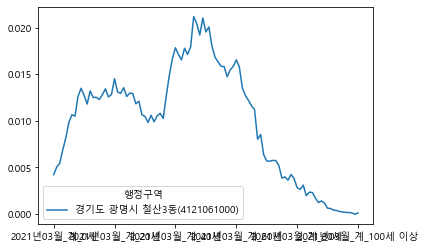

In [33]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
df2.T.plot()    #행벡터로만 가능 -> transpose해 줄것
plt.show()

In [ ]:
df2.plot()   #오류의 경우~~

### 궁금한 지역(A)의 인구 구조 비율과 차이 계산하기

In [36]:
import numpy as np
# 궁금한 지역 A의 인구 비율에서 B의 인구 비율을 뺀다
x = df.sub(df2.iloc[0], axis=1)     #iloc:위치 인덱싱(행렬)
# A의 인구 비율에서 B의 인구 비율을 뺀 값의 제곱 값을 모두 더한다.
y = np.power(x, 2)   #x^2
z = y.sum(axis=1)

### 가장 차이가 적은 상위 5개 지역 시각화하기

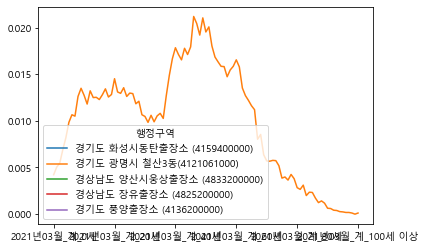

<Figure size 3000x1500 with 0 Axes>

In [45]:
i = z.sort_values().index[:5]    #그 차이가 가장 작은 지역 5곳을 찾는다.   #sort_values()에 아무것도 넣지 않으면 내림차순임
df.loc[i].T.plot()    #loc:레이블 기반 인덱싱(행벡터)
#plt.figure(figsize=(10,5), dpi=300)
plt.show()

In [39]:
i

Index(['경기도 화성시동탄출장소 (4159400000)', '경기도 광명시 철산3동(4121061000)',
       '경상남도 양산시웅상출장소 (4833200000)', '경상남도 장유출장소 (4825200000)',
       '경기도 풍양출장소 (4136200000)'],
      dtype='object', name='행정구역')

### 코드를 줄여서 표현하기(가장 비슷한 5개 지역 시각화하기)

<AxesSubplot:>

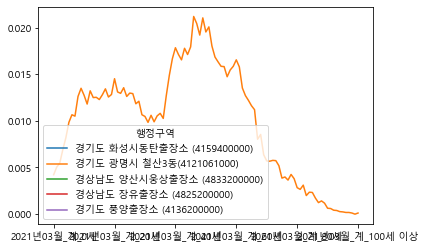

In [41]:
# 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역 찾기
df.loc[np.power(df.sub(df2.iloc[0],axis=1), 2).sum(axis=1).sort_values().index[:5]].T.plot()     #axis=0:row 합/  axis=1:column합

## 전체 코드

원하는 지역의 이름을 입력해주세요 : 철산3동


<Figure size 3000x3000 with 0 Axes>

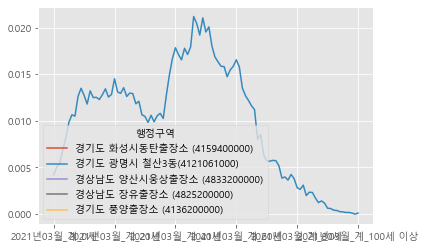

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family = 'Malgun Gothic')
plt.figure(figsize=(10,10),dpi=300)
#plt.style.use('ggplot')  

df = pd.read_csv('age.csv', encoding='cp949', index_col=0)
df = df.div(df['2021년03월_계_총인구수'], axis = 0)   #전체 데이터를 총인구수로 나눠서 비율로 변환
del df['2021년03월_계_총인구수'], df['2021년03월_계_연령구간인구수'] #총인구수, 연령구간인구수 열 삭제

name = input('원하는 지역의 이름을 입력해주세요 : ')   #지역 이름 입력
a = df.index.str.contains(name)    #해당 행을 찾아서 해당 지역의 인구 구조를 저장
df2 = df[a]

# 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역 찾기
df.loc[np.power(df.sub(df2.iloc[0],axis=1), 2).sum(axis=1).sort_values().index[:5]].T.plot()     #axis=0:row 합/  axis=1:column합

plt.show()